THEORETICAL QUEATIONS
1. What is Unsupervised Learning?
Unsupervised learning is a machine learning approach where the model learns patterns and structures from unlabeled data. Unlike supervised learning, there are no predefined outputs, and the algorithm tries to find hidden structures, such as clusters or associations, within the data.
2. How does K-Means Clustering Algorithm Work?
K-Means works by initializing k cluster centers, assigning each data point to the nearest center, then updating the centers as the mean of assigned points. This process repeats until cluster assignments stabilize or convergence is reached.
3. Explain the Concept of a Dendrogram in Hierarchical Clustering.
A dendrogram is a tree-like diagram that shows how clusters are formed in hierarchical clustering. Each merge of clusters is represented as a branch, and the vertical axis shows the distance or dissimilarity between clusters.
4. Main Difference Between K-Means and Hierarchical Clustering.
K-Means: Requires the number of clusters in advance, works on centroid-based partitioning.


Hierarchical: Builds a hierarchy without predefining cluster numbers and provides a dendrogram for analysis.


5. Advantages of DBSCAN Over K-Means.
Detects clusters of arbitrary shape.


Identifies noise/outliers.


Does not require the number of clusters in advance.


6. When Would You Use Silhouette Score?
Silhouette Score is used to evaluate clustering quality by measuring how similar a point is to its own cluster compared to other clusters. It is helpful for selecting the optimal number of clusters.
7. Limitations of Hierarchical Clustering.
Computationally expensive for large datasets.


Sensitive to noise and outliers.


Once merged, clusters cannot be split.


8. Why is Feature Scaling Important in K-Means?
K-Means relies on distance measures like Euclidean distance. Without scaling, features with larger ranges dominate, leading to biased clustering results.
9. How Does DBSCAN Identify Noise Points?
DBSCAN marks points as noise if they do not have enough neighbors within a specified radius (eps). These points do not belong to any cluster.
10. Define Inertia in K-Means.
Inertia is the sum of squared distances of data points from their assigned cluster centers. Lower inertia indicates tighter clusters.
11. What is the Elbow Method in K-Means?
The elbow method plots inertia values against different cluster numbers (k). The "elbow point," where the drop in inertia slows, suggests the optimal number of clusters.
12. Concept of Density in DBSCAN.
Density refers to how closely points are packed together. A cluster is formed when dense regions are separated by low-density areas.
13. Can Hierarchical Clustering Be Used on Categorical Data?
Yes, but distance measures like Hamming or Gower distance must be used instead of Euclidean distance.
14. What Does a Negative Silhouette Score Indicate?
A negative score means that samples are likely assigned to the wrong cluster, being closer to other clusters than their own.
15. Explain Linkage Criteria in Hierarchical Clustering.
Linkage defines how the distance between clusters is calculated. Examples:
Single linkage: Minimum distance.


Complete linkage: Maximum distance.


Average linkage: Average distance.


16. Why Might K-Means Perform Poorly on Varying Cluster Sizes or Densities?
Because K-Means assumes spherical, equally sized clusters, it struggles with clusters of different densities, shapes, or overlapping regions.
17. Core Parameters in DBSCAN.
eps: Maximum radius to consider neighbors.


min_samples: Minimum points required to form a dense cluster.
 Both parameters affect cluster size, density, and outlier detection.


18. How Does K-Means++ Improve Initialization?
K-Means++ selects initial centers strategically by spreading them apart, reducing the chances of poor clustering and speeding up convergence.
19. What is Agglomerative Clustering?
It is a bottom-up hierarchical method where each point starts as a cluster, and clusters are repeatedly merged based on similarity until one cluster remains.
20. Why is Silhouette Score Better than Inertia?
Inertia only measures compactness but ignores separation. Silhouette Score balances both compactness and separation, making it a more reliable evaluation metric.


PRACTICAL QUESTIONS
Q21: Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the clustering.


Silhouette Score: 0.678738720085253


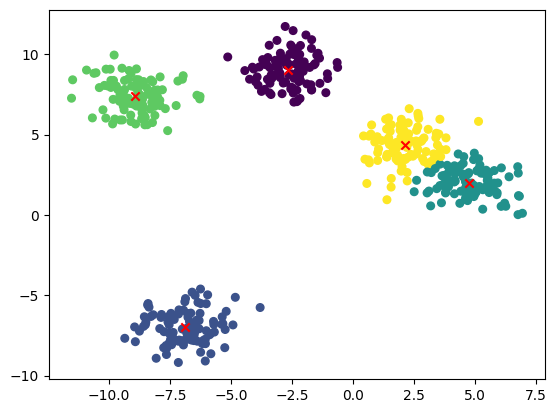

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=500, centers=5, random_state=42)
kmeans = KMeans(n_clusters=5, random_state=42).fit(X)
labels = kmeans.labels_

print("Silhouette Score:", silhouette_score(X, labels))

plt.scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="x")
plt.show()



Q22: Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering. Visualize in 2D.


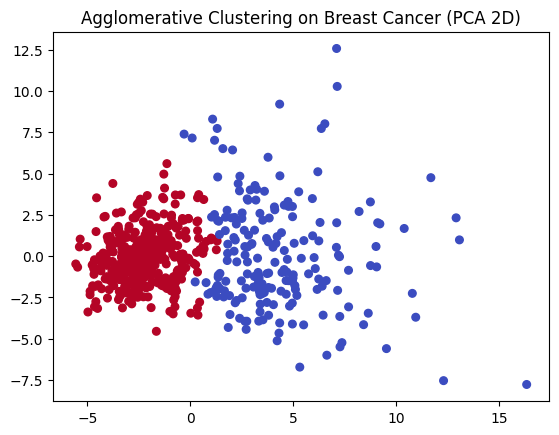

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)
X_pca = PCA(n_components=2).fit_transform(X)

agg = AgglomerativeClustering(n_clusters=2).fit(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=agg.labels_, cmap="coolwarm", s=30)
plt.title("Agglomerative Clustering on Breast Cancer (PCA 2D)")
plt.show()



Q23: Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN side-by-side.


In [ ]:
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
dbscan = DBSCAN(eps=0.2, min_samples=5).fit(X)

fig, ax = plt.subplots(1, 2, figsize=(10,4))
ax[0].scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="viridis")
ax[0].set_title("KMeans")
ax[1].scatter(X[:,0], X[:,1], c=dbscan.labels_, cmap="plasma")
ax[1].set_title("DBSCAN")
plt.show()


Q24: Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering.


Average Silhouette Score: 0.551191604619592


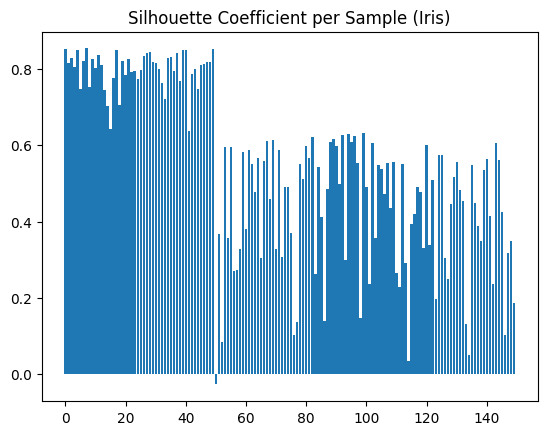

In [3]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt

X = load_iris().data
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)
labels = kmeans.labels_

sil_samples = silhouette_samples(X, labels)
print("Average Silhouette Score:", silhouette_score(X, labels))

plt.bar(range(len(sil_samples)), sil_samples)
plt.title("Silhouette Coefficient per Sample (Iris)")
plt.show()


Q25: Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage. Visualize clusters.


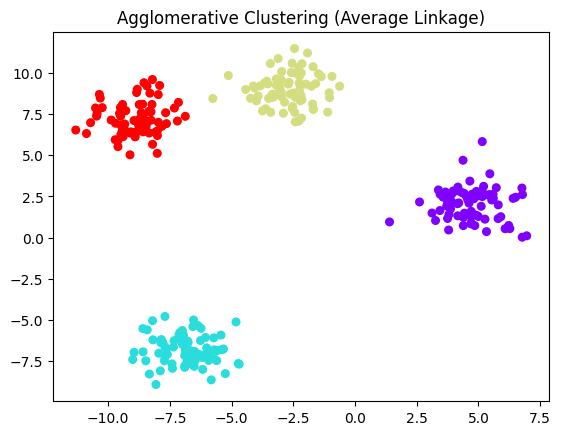

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage="average").fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap="rainbow", s=30)
plt.title("Agglomerative Clustering (Average Linkage)")
plt.show()


Q26: Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4 features).


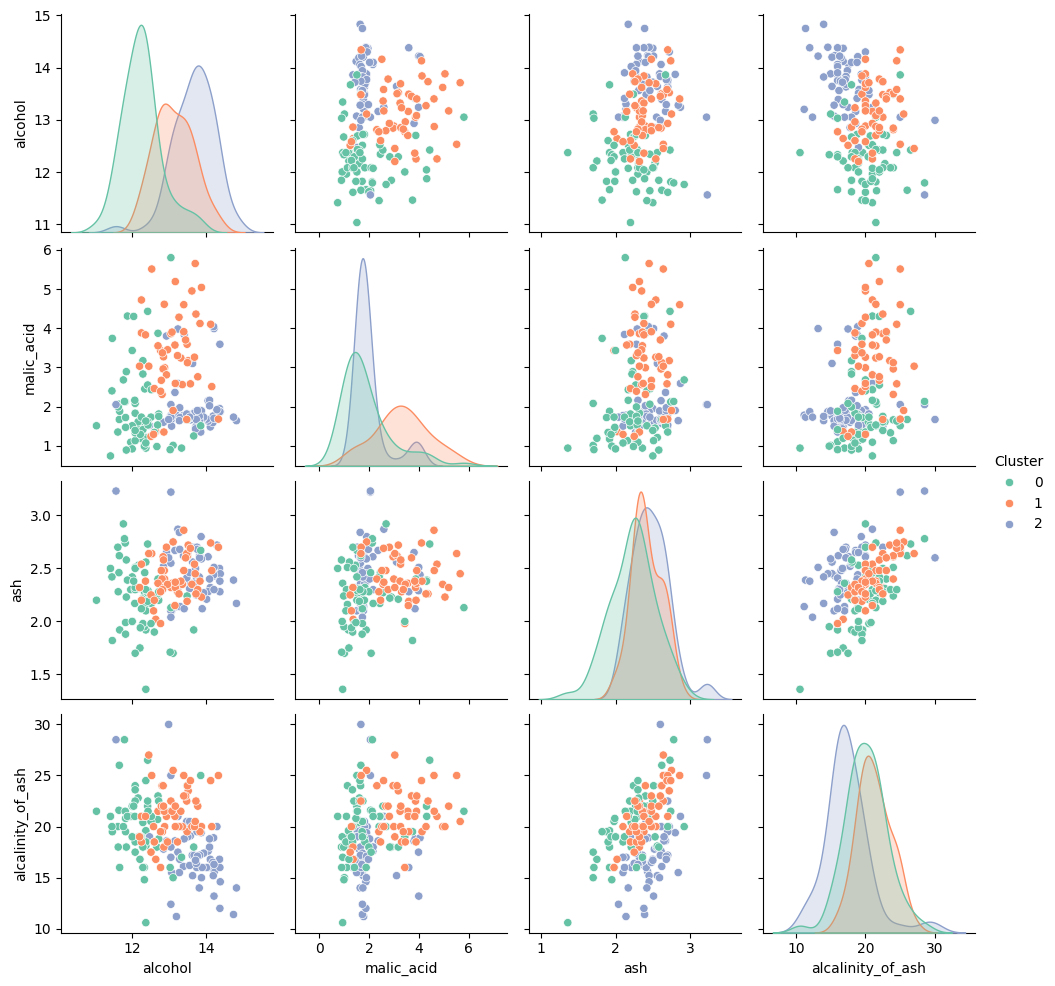

In [5]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import pandas as pd
import seaborn as sns

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

df = pd.DataFrame(wine.data[:, :4], columns=wine.feature_names[:4])
df["Cluster"] = kmeans.labels_

sns.pairplot(df, hue="Cluster", diag_kind="kde", palette="Set2")
plt.show()


Q27: Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the count.


In [6]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import numpy as np

X, _ = make_blobs(n_samples=400, centers=3, cluster_std=1.0, random_state=42)
db = DBSCAN(eps=0.5, min_samples=5).fit(X)

labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)

print("Clusters found:", n_clusters)
print("Noise points:", n_noise)



Clusters found: 4
Noise points: 52


Q28: Load the Digits dataset, reduce dimensions using t-SNE, then apply Agglomerative Clustering and plot the clusters.

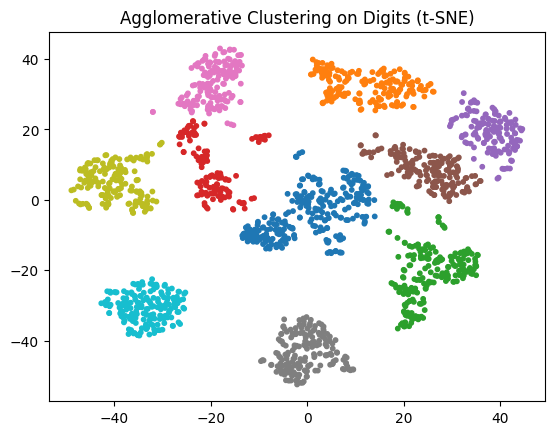

In [7]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

digits = load_digits()
X = StandardScaler().fit_transform(digits.data)

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
agg = AgglomerativeClustering(n_clusters=10).fit(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=agg.labels_, cmap="tab10", s=10)
plt.title("Agglomerative Clustering on Digits (t-SNE)")
plt.show()


Q29: Generate synthetic data with 4 centers using make_blobs and apply KMeans clustering. Visualize using a scatter plot.


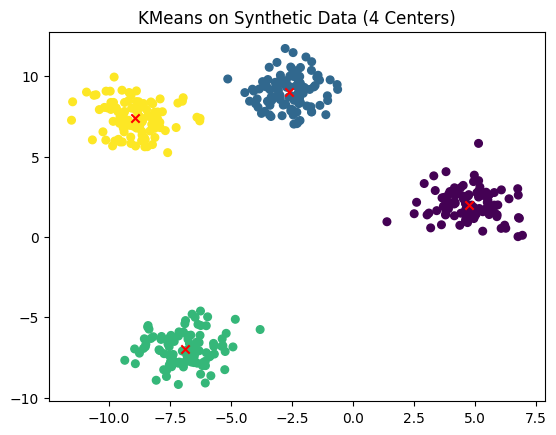

In [8]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, random_state=42)

kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="x")
plt.title("KMeans on Synthetic Data (4 Centers)")
plt.show()


Q30: Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10 predicted labels.


In [9]:
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

X = load_iris().data
agg = AgglomerativeClustering(n_clusters=3).fit(X)

print("First 10 labels:", agg.labels_[:10])


First 10 labels: [1 1 1 1 1 1 1 1 1 1]


Q31: Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot.

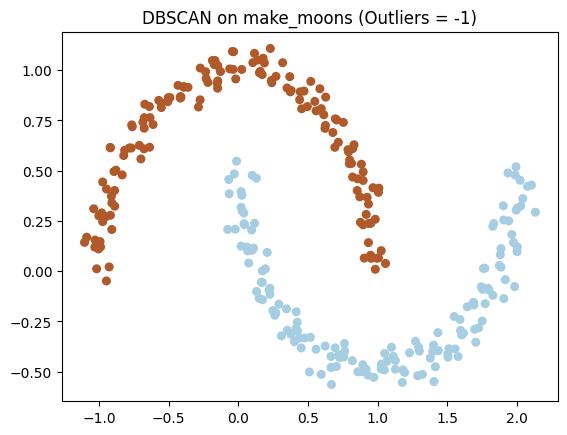

In [10]:
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=300, noise=0.05, random_state=42)

db = DBSCAN(eps=0.2, min_samples=5).fit(X)

plt.scatter(X[:,0], X[:,1], c=db.labels_, cmap="Paired", s=30)
plt.title("DBSCAN on make_moons (Outliers = -1)")
plt.show()


Q32: Load the Wine dataset and apply KMeans clustering after standardizing the features. Print the size of each cluster.

In [11]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

unique, counts = np.unique(kmeans.labels_, return_counts=True)
print("Cluster sizes:", dict(zip(unique, counts)))


Cluster sizes: {np.int32(0): np.int64(65), np.int32(1): np.int64(51), np.int32(2): np.int64(62)}


Q33: Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result.


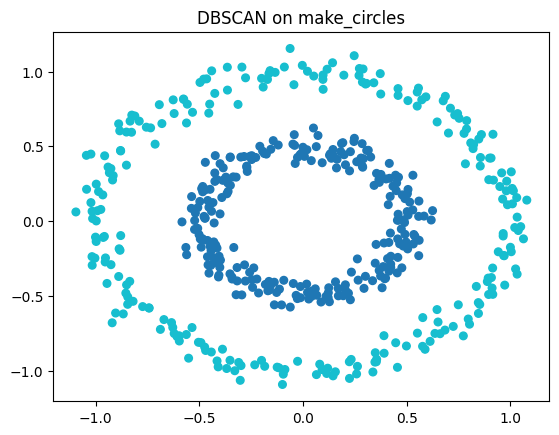

In [12]:
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

db = DBSCAN(eps=0.2, min_samples=5).fit(X)

plt.scatter(X[:,0], X[:,1], c=db.labels_, cmap="tab10", s=30)
plt.title("DBSCAN on make_circles")
plt.show()


Q34: Load the Breast Cancer dataset, apply MinMaxScaler, and use KMeans with 2 clusters. Output the cluster centroids.


In [13]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

data = load_breast_cancer()
X = MinMaxScaler().fit_transform(data.data)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)
print("Cluster centroids:\n", kmeans.cluster_centers_)


Cluster centroids:
 [[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


In [ ]:
Q35: Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with DBSCAN.


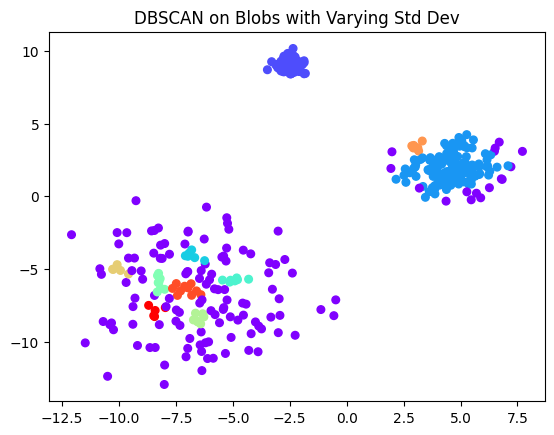

In [14]:
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=[0.3, 1.0, 2.5], random_state=42)

db = DBSCAN(eps=0.5, min_samples=5).fit(X)

plt.scatter(X[:,0], X[:,1], c=db.labels_, cmap="rainbow", s=30)
plt.title("DBSCAN on Blobs with Varying Std Dev")
plt.show()


Q36: Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from KMeans.

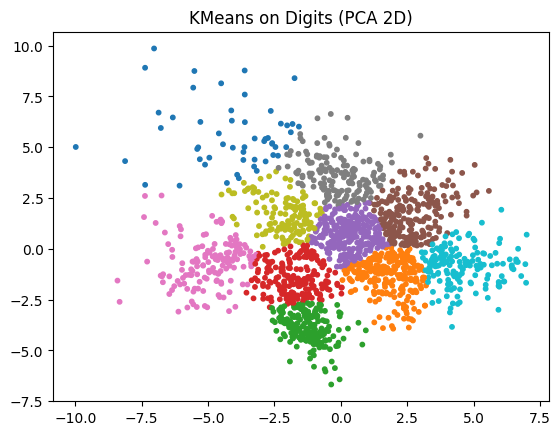

In [15]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

digits = load_digits()
X = StandardScaler().fit_transform(digits.data)

X_pca = PCA(n_components=2).fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)

plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, cmap="tab10", s=10)
plt.title("KMeans on Digits (PCA 2D)")
plt.show()


Q37: Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart.


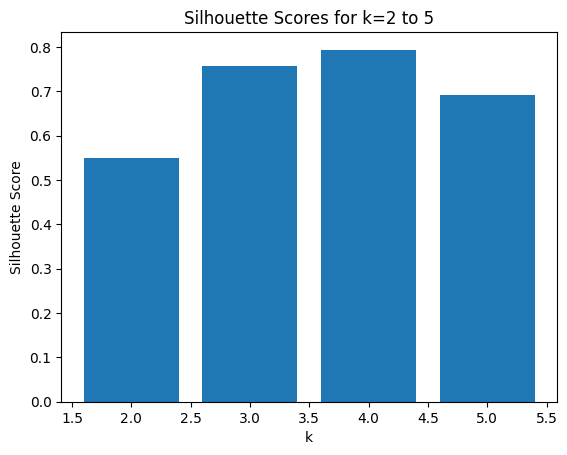

In [16]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, random_state=42)

scores = []
for k in range(2,6):
    labels = KMeans(n_clusters=k, random_state=42).fit_predict(X)
    scores.append(silhouette_score(X, labels))

plt.bar([2,3,4,5], scores)
plt.xlabel("k")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Scores for k=2 to 5")
plt.show()



Q38: Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage.


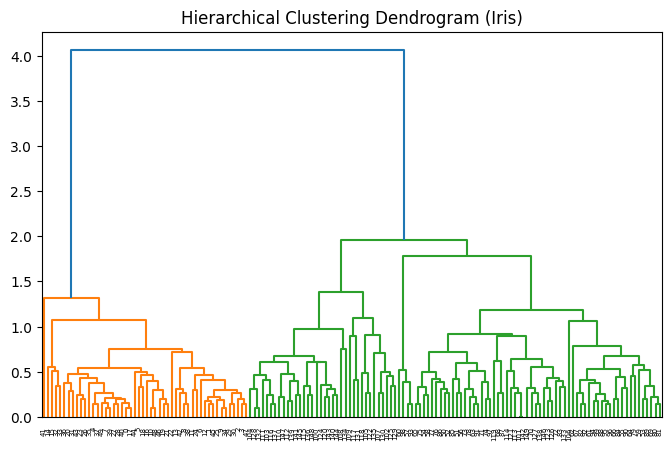

In [17]:
from sklearn.datasets import load_iris
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

X = load_iris().data
Z = linkage(X, method="average")

plt.figure(figsize=(8,5))
dendrogram(Z)
plt.title("Hierarchical Clustering Dendrogram (Iris)")
plt.show()



Q39: Generate synthetic data with overlapping clusters using make_blobs, then apply KMeans and visualize with decision boundaries

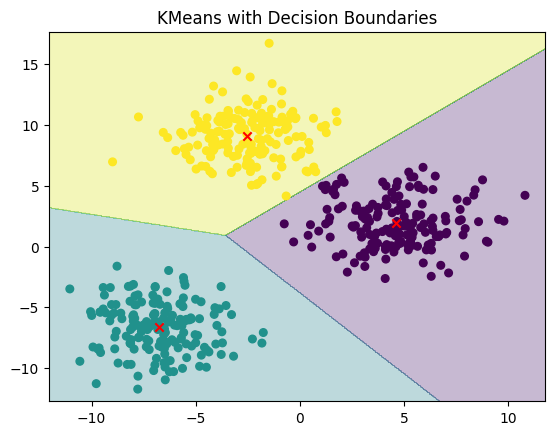

In [18]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

X, _ = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)
kmeans = KMeans(n_clusters=3, random_state=42).fit(X)

# Plot decision boundaries
h = .05
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap="viridis")
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="x")
plt.title("KMeans with Decision Boundaries")
plt.show()



Q40: Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results.


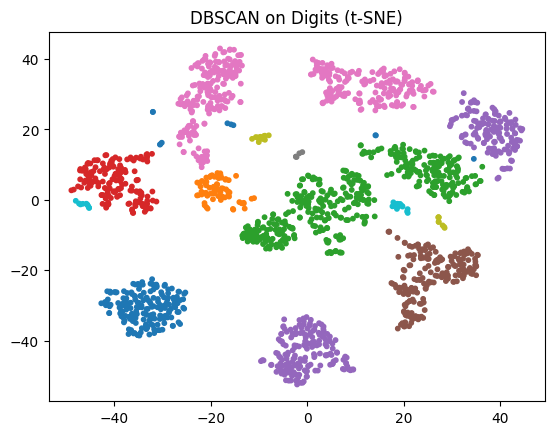

In [19]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

digits = load_digits()
X = StandardScaler().fit_transform(digits.data)

X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
db = DBSCAN(eps=3, min_samples=5).fit(X_tsne)

plt.scatter(X_tsne[:,0], X_tsne[:,1], c=db.labels_, cmap="tab10", s=10)
plt.title("DBSCAN on Digits (t-SNE)")
plt.show()


Q41: Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot the result.

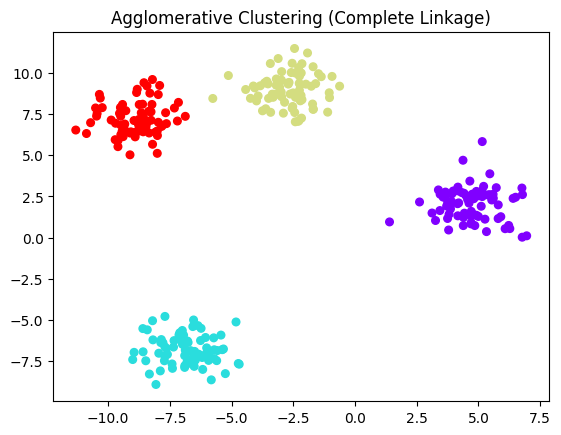

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=300, centers=4, random_state=42)

agg = AgglomerativeClustering(n_clusters=4, linkage="complete").fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap="rainbow", s=30)
plt.title("Agglomerative Clustering (Complete Linkage)")
plt.show()


Q42: Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using KMeans. Show results in a line plot.


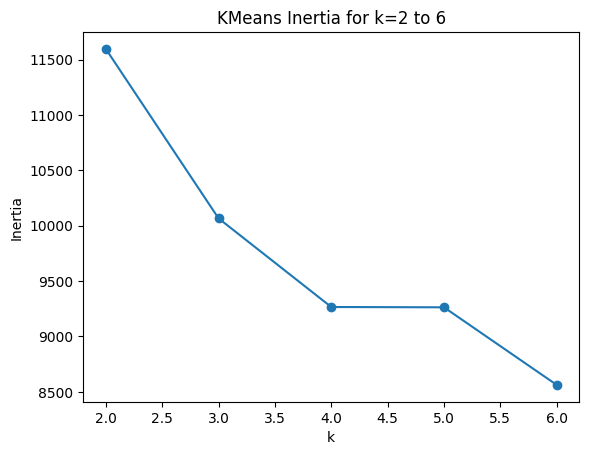

In [22]:
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = StandardScaler().fit_transform(data.data)

inertia_values = []
K = range(2,7)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    inertia_values.append(kmeans.inertia_)

plt.plot(K, inertia_values, marker="o")
plt.xlabel("k")
plt.ylabel("Inertia")
plt.title("KMeans Inertia for k=2 to 6")
plt.show()


Q43: Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with single linkage.

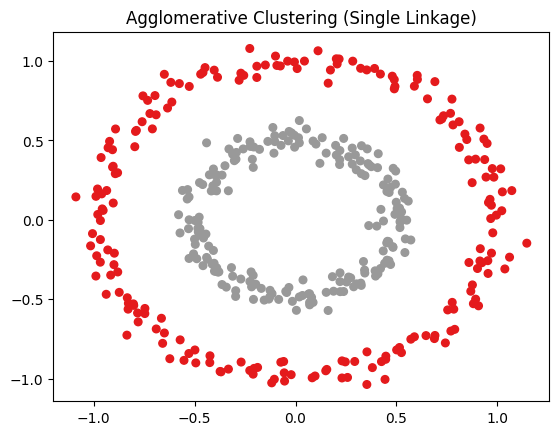

In [23]:
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

X, _ = make_circles(n_samples=400, factor=0.5, noise=0.05, random_state=42)

agg = AgglomerativeClustering(n_clusters=2, linkage="single").fit(X)

plt.scatter(X[:,0], X[:,1], c=agg.labels_, cmap="Set1", s=30)
plt.title("Agglomerative Clustering (Single Linkage)")
plt.show()


Q44: Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding noise).

In [24]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

wine = load_wine()
X = StandardScaler().fit_transform(wine.data)

db = DBSCAN(eps=1.5, min_samples=5).fit(X)

labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
print("Number of clusters (excluding noise):", n_clusters)


Number of clusters (excluding noise): 0


Q45: Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the data points.


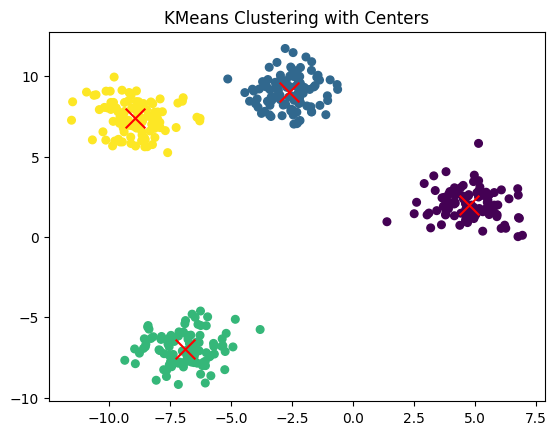

In [25]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_blobs(n_samples=400, centers=4, random_state=42)
kmeans = KMeans(n_clusters=4, random_state=42).fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="viridis", s=30)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c="red", marker="x", s=200)
plt.title("KMeans Clustering with Centers")
plt.show()



Q46: Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise.


In [26]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X = StandardScaler().fit_transform(load_iris().data)

db = DBSCAN(eps=0.8, min_samples=5).fit(X)
print("Noise samples:", list(db.labels_).count(-1))


Noise samples: 4


Q47: Generate synthetic non-linearly separable data using make_moons, apply KMeans, and visualize the clustering result.

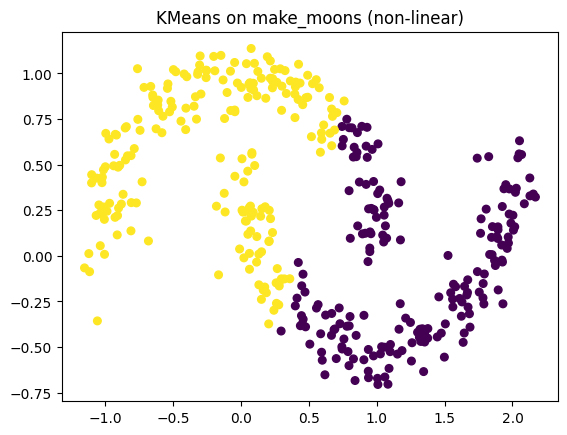

In [27]:
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X, _ = make_moons(n_samples=400, noise=0.1, random_state=42)

kmeans = KMeans(n_clusters=2, random_state=42).fit(X)

plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap="viridis", s=30)
plt.title("KMeans on make_moons (non-linear)")
plt.show()


Q48: Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D scatter plot.

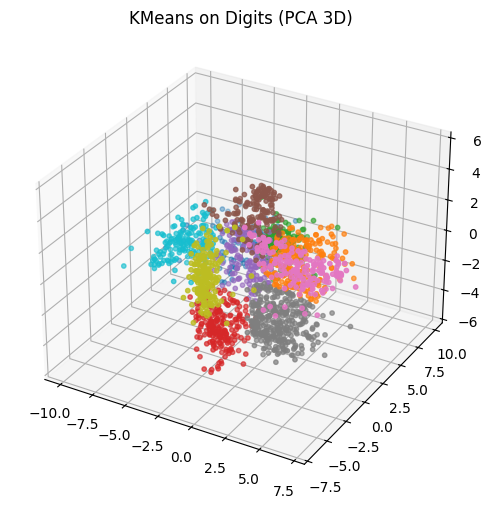

In [28]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

digits = load_digits()
X = StandardScaler().fit_transform(digits.data)

X_pca = PCA(n_components=3).fit_transform(X)
kmeans = KMeans(n_clusters=10, random_state=42).fit(X_pca)

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=kmeans.labels_, cmap="tab10", s=10)
ax.set_title("KMeans on Digits (PCA 3D)")
plt.show()
